# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

## Step 1 - Loading the Dataset
In this step, Combination of the dataset from each branch (3 branches) into one dataset for easy analysis will be done. The syntaxes that will read multiple files from the current working directory was used and a CSV file after combining was exported. 


####  Import Libraries

In [458]:
import os
import glob
import pandas as pd
os.chdir("C:/Users/mutiat/Documents/Ustacky/Data-Analysis-Project-main") #Current working directory that contains your dataset and code file

#### To-Do - Use glob to match the pattern "csv"

In [459]:
# Getting all the data of the 3 branches
extension = 'csv'
data = glob.glob('*_Branch.{}'.format(extension)) 
data

['Abuja_Branch.csv', 'Lagos_Branch.csv', 'Port_Harcourt_Branch.csv']

####  Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [431]:
#Combining all the 3 files into a combined_data
combined_data = pd.concat([pd.read_csv(x) for x in data], ignore_index=True)

#Export to csv
combined_data.to_csv( "combined_data", index=False)

#### Read the CSV file using `pd.read_csv` method

In [432]:
#Read the combined_data
pd.read_csv('combined_data.csv')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,148-41-7930,C,Port Harcourt,Normal,Male,Health and beauty,35985.6,7,12594.96,264494.16,1/23/2019,10:33,Cash,251899.2,4.761905,12594.96,6.1
996,189-40-5216,C,Port Harcourt,Normal,Male,Electronic accessories,34693.2,7,12142.62,254995.02,1/9/2019,11:40,Cash,242852.4,4.761905,12142.62,6.0
997,267-62-7380,C,Port Harcourt,Member,Male,Electronic accessories,29642.4,10,14821.20,311245.20,3/29/2019,19:12,Epay,296424.0,4.761905,14821.20,4.3
998,652-49-6720,C,Port Harcourt,Member,Female,Electronic accessories,21942.0,1,1097.10,23039.10,2/18/2019,11:40,Epay,21942.0,4.761905,1097.10,5.9


## Step 2 - Data Exploration
In this step the loaded dataset using some built-in Pandas function was explored. 

### Import Libraries

In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')


####  Use the head() method to view first few rows of the dataset

In [435]:
# Preview of the table head
combined_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


#### Check the number of rows and columns present in the data using the shape attribute.

In [436]:
#Checking the number of rows and columns
combined_data.shape

(1000, 17)

* There are 1000 rows and 17 columns

####  Generate the names of the columns using the columns attribute.

In [437]:
#Getting the name in each column
combined_data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

####  Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [438]:
#Getting the statistical summary of the dataset 
combined_data.describe(include ='all')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1.000000e+03,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,845-94-6841,A,Lagos,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,14:42,Epay,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,20041.966800,5.510000,5536.572840,116268.029640,NaN,NaN,NaN,110731.456800,4.761905e+00,5536.572840,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,9538.066205,2.923431,4215.177173,88518.720636,NaN,NaN,NaN,84303.543463,6.131498e-14,4215.177173,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,3628.800000,1.000000,183.060000,3844.260000,NaN,NaN,NaN,3661.200000,4.761905e+00,183.060000,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,11835.000000,3.000000,2132.955000,44792.055000,NaN,NaN,NaN,42659.100000,4.761905e+00,2132.955000,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,19882.800000,5.000000,4351.680000,91385.280000,NaN,NaN,NaN,87033.600000,4.761905e+00,4351.680000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,28056.600000,8.000000,8080.290000,169686.090000,NaN,NaN,NaN,161605.800000,4.761905e+00,8080.290000,8.50000


####  Below this cell write in few sentences what you can derive from the data statistical summary

### From the data statistical summary, the following can be derived;

* There are 1000 rows and 17 columns.

* The supermarket has 3 different branches in 3 different cities. 

* Each branch has 2 different customer types and gender.

* It could also be seen that a female member with invoice ID 845-94-6841 from Lagos has the most common value with fashion accessories products.

* The average quantity is 5.5 with total amount of 116268. 

* The minimum unit price is 3628 while the maximum unit price is 35985. 

* The maximum rating is 10. 

* Epay has the highest mode of payment.

####  Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, using that to observe the presence of missing data in the dataset. The sum method was added to get a summary and not boolean values.

In [439]:
# Getting the number of missing values from each column
combined_data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [440]:
#Getting the number of not null in each column
combined_data.notna().sum()

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

#### Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. This method was used to observe the data type of each feature.

In [441]:
#Getting a concise summary of the dataset
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

####  Use `to_datetime()` to convert the `date` column to `datetime`

In [442]:
# Converting the date to the appropriate datetime format
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

#### To-Do - Check the datatype to confirm if it's in `datetime`

In [443]:
#Checking the datatype of the date
combined_data['Date'].dtype

dtype('<M8[ns]')

In [444]:
#Checking if the datatype shown under the same is the same as datetime datatype
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

####  Repeat the two steps above to the `time` column

In [446]:
#Converting the Time column to the appropriate format
combined_data['Time'] = pd.to_datetime(combined_data['Time'])

In [447]:
#Checking the Time datatype
combined_data['Time'].dtype

dtype('<M8[ns]')

## Extract Features from date & time

####  Extract the Day feature from the `Date` column, and save to a new `Day` column

In [449]:
#Creating Day column from the Date column
combined_data['Day'] = combined_data['Date'].dt.day

####  Extract the Month feature from the `Date` column, and save to a new `Month` column

In [450]:
#Creating Month column from the Date column
combined_data['Month'] = combined_data['Date'].dt.month

#### Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [451]:
#Creating Year column from the Date column
combined_data['Year'] = combined_data['Date'].dt.year

####  Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [452]:
#Creating Hour column from the Time column
combined_data['Hour'] = combined_data['Time'].dt.hour

In [454]:
#Checking the table head to confirm necessary columns are created
combined_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,2021-02-01 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,2021-02-01 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,2021-02-01 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,...,2021-02-01 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019,16
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,...,2021-02-01 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019,15


#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [455]:
#Getting an array of unique hours of sales in the supermarket
combined_data['Hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

In [457]:
#Counting the number of unique hours of sales
combined_data['Hour'].nunique()

11

## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [460]:
#Getting columns with object datatype
categorical_columns = [col for col in combined_data.columns if combined_data[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

#### From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).

</br>
<br/>
Adding print formating syntax to print out the total numbers of these values in a particular column. 

### 1. Unique values in the "Branch" column with the total number using the print formatting

In [463]:
#Getting the Unique Branch
combined_data['Branch'].unique().tolist()

['B', 'A', 'C']

In [464]:
print("Total Number of unique values in the Branch Column : {}". format(len(combined_data['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


### 2. Unique values in the "City" column with the total number using the print formatting

In [465]:
#Creating an object to get the unique city
unique_city = combined_data['City'].unique().tolist()

#To get the unique city
unique_city

['Abuja', 'Lagos', 'Port Harcourt']

In [466]:
print("Total Number of unique City : {}". format(len(unique_city)))

Total Number of unique City : 3


### 3. Unique values in the "Customer type" column with their total numbers using print formatting

In [467]:
#Creating an object to get the unique customer
unique_customer = combined_data['Customer type'].unique().tolist()
#To display the unique customer type
unique_customer

['Member', 'Normal']

In [468]:
print("Total Number of unique values in the Customer type column : {}".format(len(unique_customer)))

Total Number of unique values in the Customer type column : 2


### 4. Unique values in the "Gender" column with their total numbers using print formatting

In [469]:
#Creating an object to get the unique gender
unique_gender = combined_data['Gender'].unique().tolist()
#To display the unique customer type
unique_gender

['Female', 'Male']

In [470]:
print("Total Number of unique gender : {}".format(len(unique_gender)))

Total Number of unique gender : 2


### 5. Unique values in the "Product line" column with their total numbers using print formatting

In [471]:
#Creating an object to get the unique Product line
unique_product = combined_data['Product line'].unique().tolist()

#To display the unique products
unique_product

['Food and beverages',
 'Fashion accessories',
 'Electronic accessories',
 'Sports and travel',
 'Home and lifestyle',
 'Health and beauty']

In [472]:
print("Total Number of unique values in the Product line column : {}".format(len(unique_product)))

Total Number of unique values in the Product line column : 6


### 6. Unique values in the "Payment" column with their total numbers using print formatting

In [473]:
#Creating an object to get the unique mode of payment
unique_payment = combined_data['Payment'].unique().tolist()

#To display the unique products
unique_payment

['Card', 'Epay', 'Cash']

In [474]:
print("Total Number of unique mode of payment : {}".format(len(unique_payment)))

Total Number of unique mode of payment : 3


####  The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above,  the count figure of the values was generated using the `value_counts() ` method.


## Count of unique values in the following columns: City, Branch, Customer type, Gender, Payment and Product line

### Count of values in the "City" column

In [475]:
combined_data['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

* Port Harcourt has the lowest dataset 

### Count of values in the "Branch" column

In [476]:
combined_data['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

### Count of values in the "Customer type" column

In [477]:
combined_data['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

* There types of the customers are almost equal

### Count of values in the "Gender" column

In [478]:
combined_data['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

* Both male and female patronize the supermarket with almost same ratio

### Count of values in the "Payment" column

In [479]:
combined_data['Payment'].value_counts()

Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64

* Card is the lowest payment method used

### Count of values in the "Product line" column

In [480]:
combined_data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

* The purchase of Health and beauty product line is low in the months of January to March

## Step 5 - Aggregration with GroupBy

####  Creating a groupby object with the "City Column", and aggregation function of sum and mean. 

In [484]:
# Creating a groupby object to group the dataset according to City 
group_by_city = combined_data.groupby('City')

#To get the sum and mean of the numeric columns 
group_by_city.agg(['sum', 'mean'])

Unit price               Quantity                Tax 5%  \
                     sum          mean      sum      mean         sum   
City                                                                    
Abuja          6652396.8  20037.339759     1820  5.481928  1820531.52   
Lagos          6705176.4  19721.107059     1859  5.467647  1820577.78   
Port Harcourt  6684393.6  20379.248780     1831  5.582317  1895463.54   

                                  Total                       cogs  \
                      mean          sum           mean         sum   
City                                                                 
Abuja          5483.528675  38231161.92  115154.102169  36410630.4   
Lagos          5354.640529  38232133.38  112447.451118  36411555.6   
Port Harcourt  5778.852256  39804734.34  121355.897378  37909270.8   

                              ...  Rating             Day            Month  \
                        mean  ...     sum      mean   sum       mean   sum   
City                          ...                                            
Abuja          109670.573494  ...  2263.6  6.818072  5068  15.265060   665   
Lagos          107092.810588  ...  2389.2  7.027059  5232  15.388235   688   
Port Harcourt  115577.045122  ...  2319.9  7.072866  4956  15.109756   640   

                           Year        Hour             
                   mean     sum  mean   sum       mean  
City                                                    
Abuja          2.003012  670308  2019  5029  15.147590  
Lagos          2.023529  686460  2019  4987  14.667647  
Port Harcourt  1.951220  662232  2019  4894  14.920732  

[3 rows x 24 columns]

####  Using the groupby object to display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [485]:
# Using the groupby object ot get the gross income of each city
gross_city = group_by_city['gross income'].sum().reset_index()
#Displaying the gross income per city
gross_city

,City,gross income
0,Abuja,1820531.52
1,Lagos,1820577.78
2,Port Harcourt,1895463.54


In [486]:
#Getting the city with the highest gross income 
gross_city.max().reset_index()

,index,0
0,City,Port Harcourt
1,gross income,1.89546e+06


* Port Harcourt has the highest gross income

In [487]:
#Grouping City with some other columns
city_with_other_columns = group_by_city['Unit price', 'Quantity', 'Total', 'gross margin percentage'].sum().reset_index()
city_with_other_columns

,City,Unit price,Quantity,Total,gross margin percentage
0,Abuja,6652396.8,1820,38231161.92,1580.952381
1,Lagos,6705176.4,1859,38232133.38,1619.047619
2,Port Harcourt,6684393.6,1831,39804734.34,1561.904762


* Lagos has the highest unit price,quantity, and gross margin percentage respectively


* Port Harcourt has the highest total

In [488]:
#Getting the maximum value of the columns
city_with_other_columns.max().reset_index()

,index,0
0,City,Port Harcourt
1,Unit price,6.70518e+06
2,Quantity,1859
3,Total,3.98047e+07
4,gross margin percentage,1619.05


### To determine the Product line with the highest gross income

In [489]:
prod = combined_data[['Product line', 'gross income']]
prod_group = prod.groupby('Product line').sum().reset_index()
prod_group

,Product line,gross income
0,Electronic accessories,931500.54
1,Fashion accessories,930958.20
2,Food and beverages,962483.04
3,Health and beauty,843321.24
4,Home and lifestyle,923347.08
5,Sports and travel,944962.74


* `Food and beverages` has the highest gross income

### Top 3 product bought in Lagos between January and February

In [490]:
#Between January and February means either January or February and | means or
last_two_month = combined_data[(combined_data['Month'] == 1) | (combined_data['Month'] == 2)]

#Now for Lagos
Lagos_last_two_month = last_two_month[last_two_month['City'] == 'Lagos']

# There is need for the product bought pattern so the column relating to this is the Quantity
#Product line is groupby using the sum of quantity
bought_last_two_month = Lagos_last_two_month[['Product line', 'Quantity']].groupby('Product line').sum()
bought_last_two_month

,Quantity
Product line,
Electronic accessories,206
Fashion accessories,193
Food and beverages,217
Health and beauty,125
Home and lifestyle,243
Sports and travel,194


In [491]:
#Then the table is sort to get the order
sorted_bought = bought_last_two_month.sort_values(by = 'Quantity', ascending = False)

#Top three
sorted_bought[:3]

,Quantity
Product line,
Home and lifestyle,243
Food and beverages,217
Electronic accessories,206


### The City that has the highest sales in each month

In [492]:
#The concern column are "Month", "city", "Total" and probably "gross incoe" 
sales = combined_data[['Month', 'City', 'Total', 'Quantity']]

#The columns are groupby month with the maximum() method
sales_group = sales.groupby('Month').max()

#The groupby table is sorted according to the highest total 
sales_group.sort_values(by = 'Total', ascending = False)

,City,Total,Quantity
Month,,,
2,Port Harcourt,375354.0,10
1,Port Harcourt,372405.6,10
3,Port Harcourt,368096.4,10


* Port Harcourt has the highest total in all the months analysed

In [493]:
sales_quantity = combined_data[['Branch','Quantity']]
group = sales_quantity.groupby('Branch').count()
group

,Quantity
Branch,
A,340
B,332
C,328


* Branch A has the largest quantity sold 

## Step 6 - Data Visualization

In this section, Some questions are answered by generating charts and making use of different plotting styles. Using `Seaborn visualization` library to generate the plots. For all visualizations, a chart title was included by using the seaborn `set_title` method

#### Using `countplot` to determine the branch with the highest sales record and some other insights.  

## Branch A has the highest sales record as shown in the plot below

Text(0.5, 1.0, 'Branch against Sales')

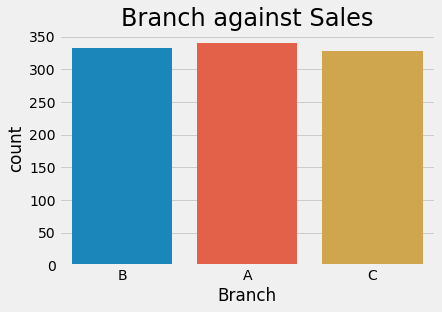

In [336]:
sns.countplot(x= 'Branch', data = combined_data).set_title("Branch against Sales", size = 24)

## Epay is the most payment method used as shown in the plot below

Text(0.5, 1.0, 'Count of different payment card')

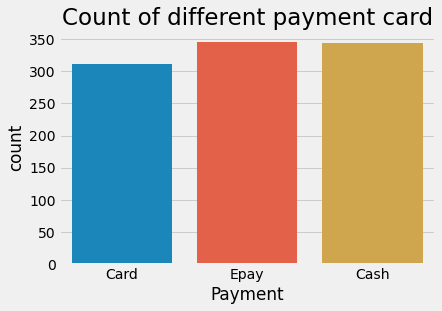

In [334]:
sns.countplot(x = 'Payment', data = combined_data).set_title('Count of different payment card', size = 23)

## Lagos city has the largest sales as shown in the plot below

Text(0.5, 1.0, 'City Vs Sales')

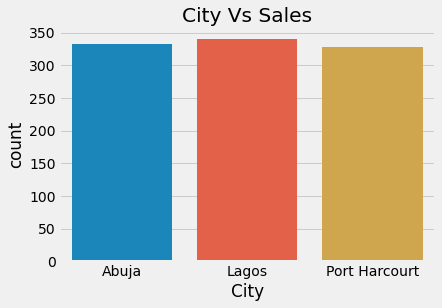

In [335]:
sns.countplot(x = 'City', data = combined_data).set_title('City Vs Sales')

#### Explore a countplot for the `Payment` and `City` Column

####  Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

## Highest Product line sold: Fashion accessories
## Lowest Product line sold: Health and beauty

Text(0.5, 1.0, 'Count of sales in different product line')

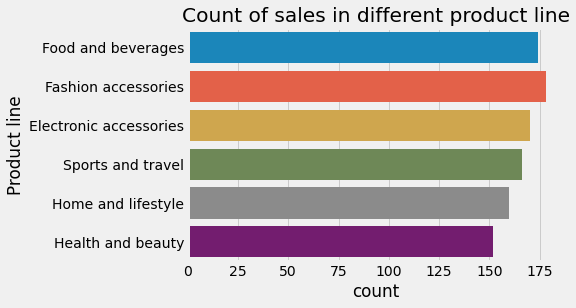

In [339]:
sns.countplot(y = 'Product line', data = combined_data).set_title('Count of sales in different product line')

#### Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

## The most payment mode used by each product line can be seen in the plot below

Text(0.5, 1.0, 'Payment mode VS Product line')

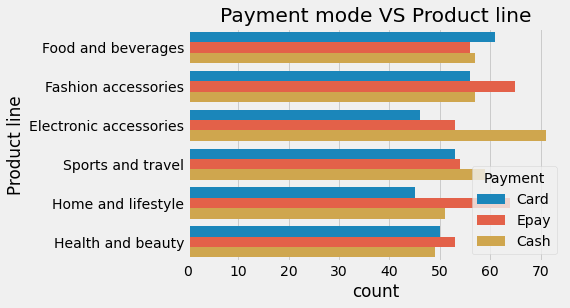

In [341]:
sns.countplot(y = 'Product line', data = combined_data, hue = 'Payment').set_title('Payment mode VS Product line')

####  Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

## The Plot of Payment and Branch to display the count of each payment method in different branch is shown below

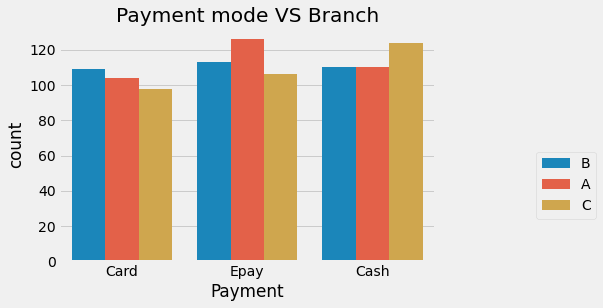

In [505]:
sns.countplot(x = 'Payment', data = combined_data, hue = 'Branch').set_title('Payment mode VS Branch')
plt.legend(loc='upper left', bbox_to_anchor=(1.25, 0.5), ncol=1)

### Insights
* Epay is mostly used in branch A


* Branch A and B use cash mode of payment equally

####  Determine the branch with the lowest rating. This can be determine using a box plot which gives a statistical summary of the plotted features, and we can pick out the branch with the lowest rating from the plot

## The lowest rating branch from the plot below is branch B

Text(0.5, 1.0, 'Rating against Branch')

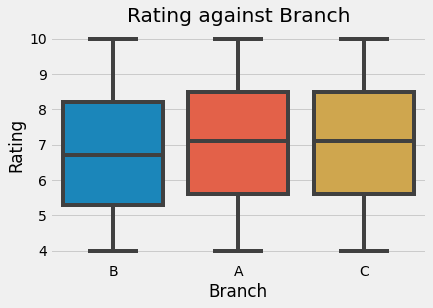

In [346]:
sns.boxplot(x = 'Branch', y = 'Rating', data = combined_data).set_title("Rating against Branch")

####  The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Seting the aspect parameter to 4, so we can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

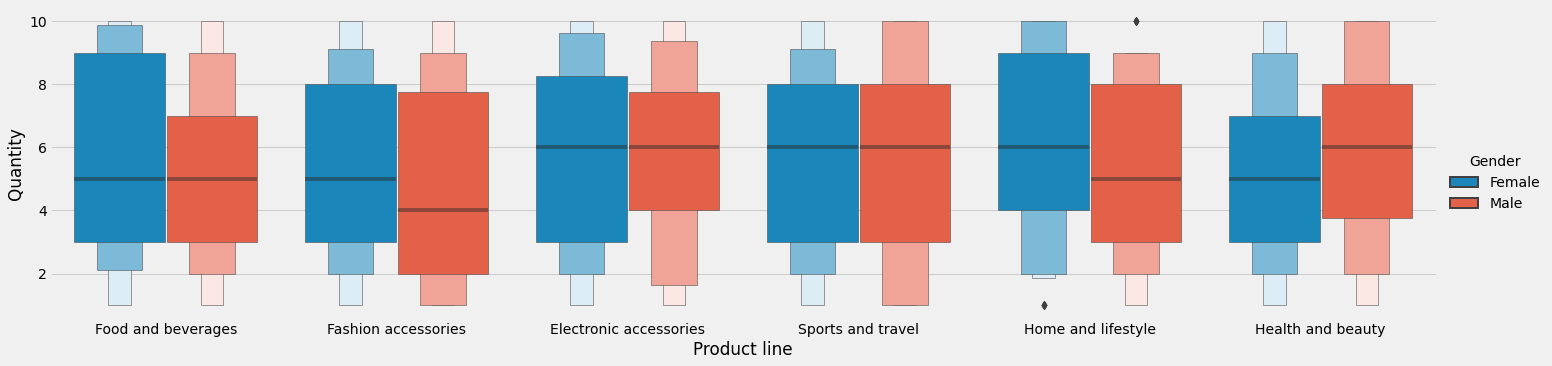

In [363]:
sns.catplot(x = 'Product line', y = 'Quantity', hue = 'Gender', kind= 'boxen', data = combined_data, aspect = 4)

### Insights
* Females get more of Fashion Accessories.


* Health and beauty products are bought more by males


* The purchase of Food and beverages, Electronic accessories and Sport and travel are distributive between the two genders.

## Plot of same chart, but `Total Column` as the y-axis


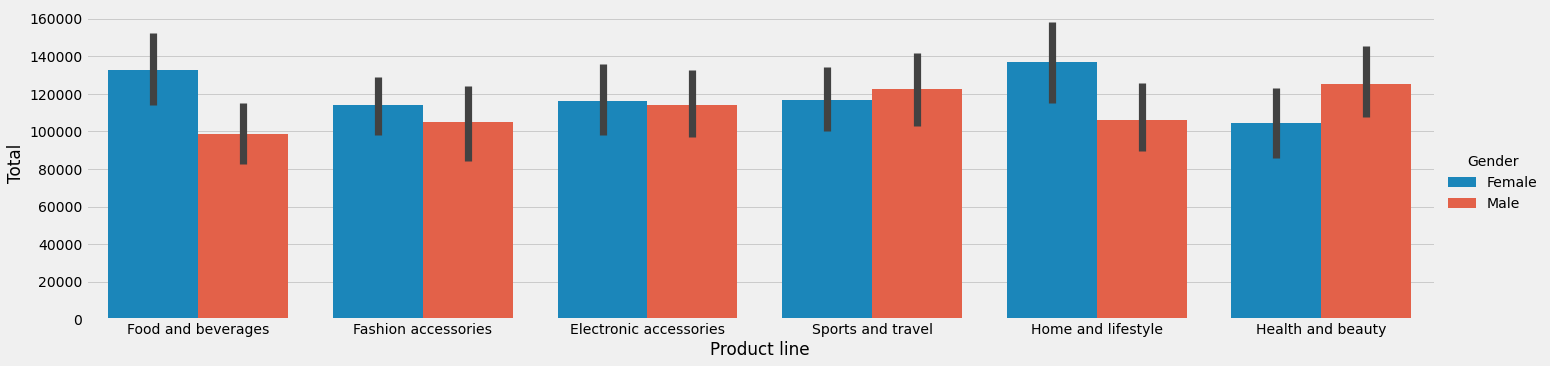

In [495]:
sns.catplot(x = 'Product line', y = 'Total', hue = 'Gender', kind= 'bar', data = combined_data, aspect = 4)

### Insights
* The amount of food and beverages bought by Female is more

* Male has higher total in Health and beuty also in sport and travel

####  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

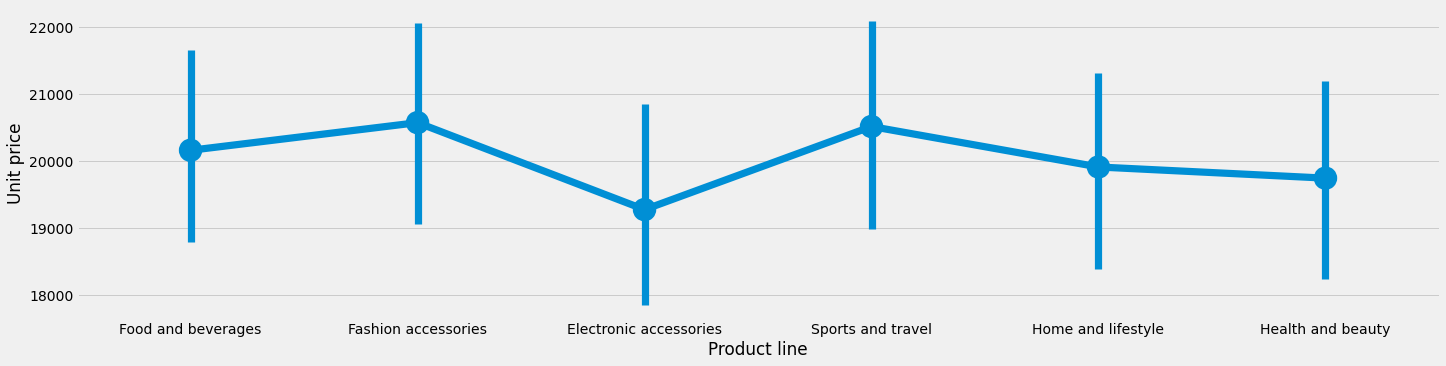

In [508]:
sns.catplot(y = 'Unit price', x = 'Product line', kind= 'point', data = combined_data, aspect = 4)

### Insights

*  Fashion accessories has largest unit price


*  Electronic accessories has the lowest unit price

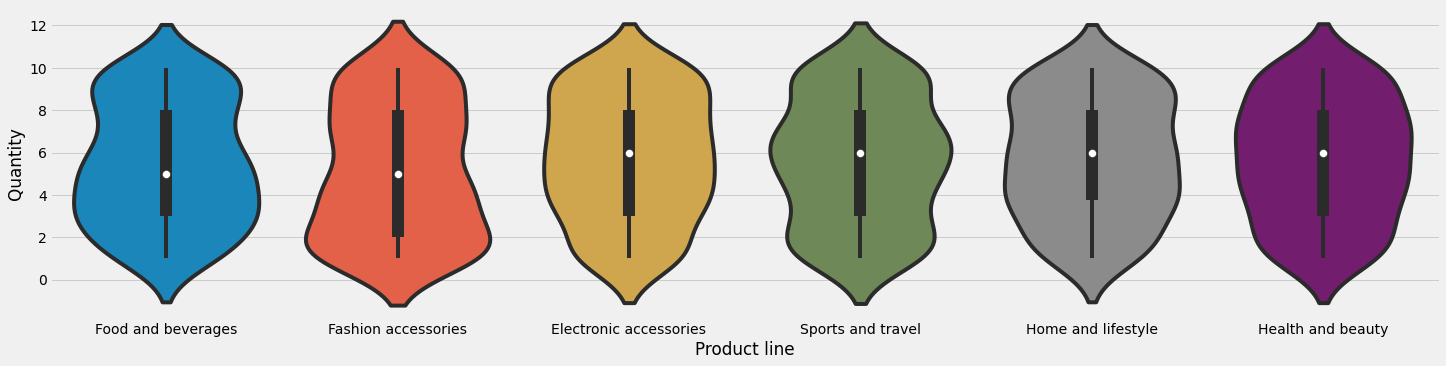

In [509]:
sns.catplot(y = 'Quantity', x = 'Product line', kind= 'violin', data = combined_data, aspect =4)

### Insights

*  Fashion accessories has the lowest quantity bought probably because the unit price is high


*  Electronic accessories has the highest quantity sold since they has the lowest unit price

## Step 7 - StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


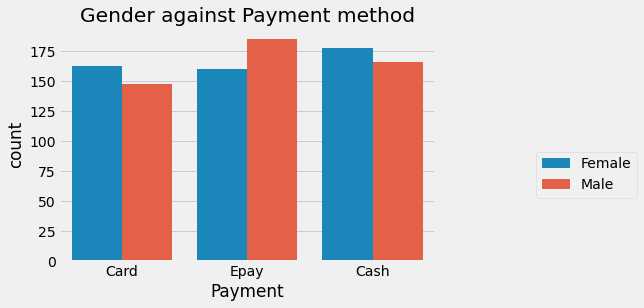

In [503]:
sns.countplot(x = 'Payment', data = combined_data, hue = 'Gender').set_title("Gender against Payment method")
plt.legend(loc='upper left', bbox_to_anchor=(1.25, 0.5), ncol=1)

### Insights

* Male uses more of Epay method


* Female uses more of Cash to transact

Text(0.5, 1.0, 'Rating against Gender')

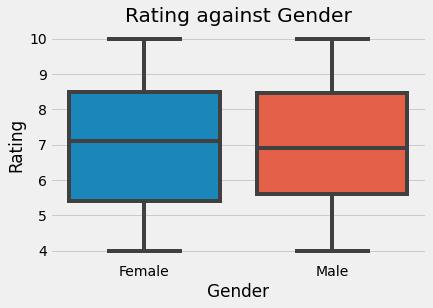

In [422]:
sns.boxplot(x = 'Gender', y = 'Rating', data = combined_data).set_title("Rating against Gender")

### Insight
* Female has the lowest rating count

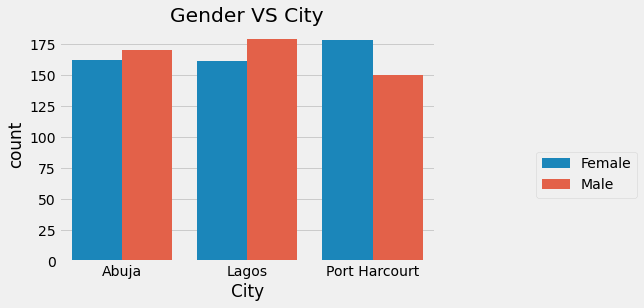

In [502]:
sns.countplot(x = 'City', hue = 'Gender', data = combined_data).set_title("Gender VS City")
plt.legend(loc='upper left', bbox_to_anchor=(1.25, 0.5), ncol=1)

### Insights

*  Lagos has more of Male that patronize the supermarket

*  PortHarcourt has more of Female that patronize the supermarket

*  Abuja also have more of male but with little difference to the female count

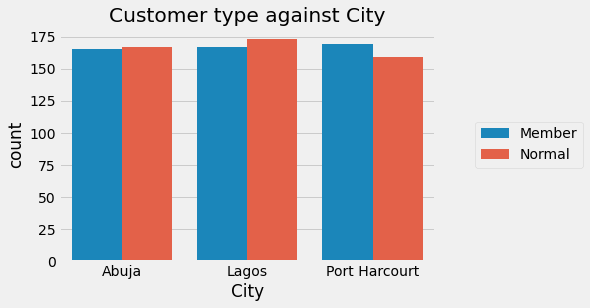

In [499]:
sns.countplot(x = 'City', hue = 'Customer type', data = combined_data).set_title("Customer type against City")

plt.legend(loc='center', bbox_to_anchor=(1.25, 0.5), ncol=1)

### Insights
* Abuja has almost the same number of member and normal customer type

* Port Harcourt has more of member customer type

* Lagos has more of Normal customer type

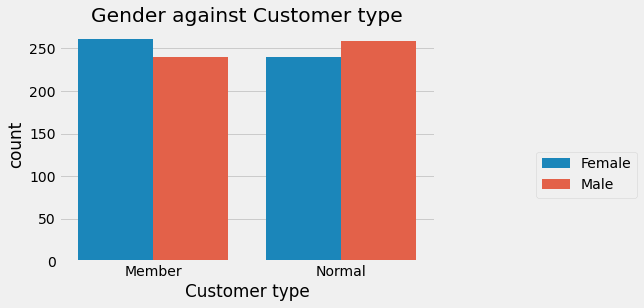

In [504]:
sns.countplot(x = 'Customer type', hue = 'Gender', data = combined_data).set_title("Gender against Customer type")
plt.legend(loc='upper left', bbox_to_anchor=(1.25, 0.5), ncol=1)

### Insights

* Females are more of Member Customer Type while Males are more of Normal Customer Type

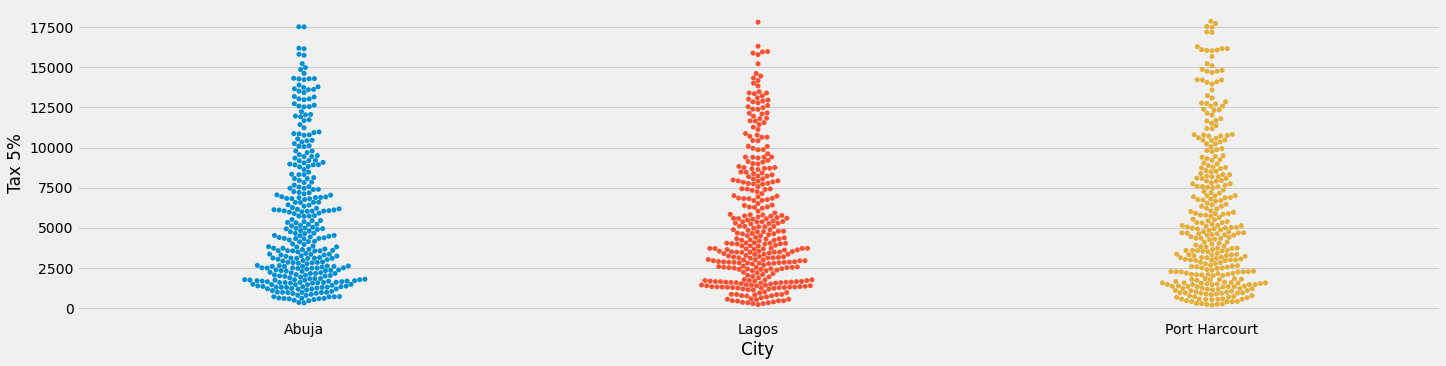

In [512]:
sns.catplot(y = 'Tax 5%', x = 'City', kind= 'swarm', data = combined_data, aspect =4)

### Insights

* Port Harcourt pay the higest tax since it has the highest sales record from the insights above

* Lagos pay the lowest tax

## Step 8 - Documentation.

* A detailed `ReadMe` that describes the project was written, it explains important approach followed to solve the tasks. 

### Each step is explained with the insight derived